In [109]:
import pandas as pd
from datetime import datetime
from epiweeks import Week, Year
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt


In [58]:
df = pd.read_csv("C:\\Users\\ljens\\OneDrive\\Documents\\MSU MPH\\capstone\\daily syndromic ILICC.csv")

In [59]:
df.head()

,Admitted,Current Complaint,Initial Complaint
0,3/28/2004 7:39,COUGH FEVER SORE THROAT,COUGH FEVER SORE THROAT
1,6/25/2004 20:30,SORE THROAT FEVER ACHES,SORE THROAT FEVER ACHES
2,7/9/2004 10:41,FEVER SORE THROAT PULLING AT EARS,FEVER SORE THROAT PULLING AT EARS
3,8/1/2004 22:46,PT STS SORE THROAT FEVER,PT STS SORE THROAT FEVER
4,11/11/2004 20:20,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH


In [60]:
df['Admitted'] = pd.to_datetime(df['Admitted'])

In [61]:
df['Admitted'].head()

0   2004-03-28 07:39:00
1   2004-06-25 20:30:00
2   2004-07-09 10:41:00
3   2004-08-01 22:46:00
4   2004-11-11 20:20:00
Name: Admitted, dtype: datetime64[ns]

In [62]:
Week.fromdate(df['Admitted'][0], system='cdc')

Week(2004, 13, CDC)

In [63]:
df['Admitted'].head().apply(lambda x: Week.fromdate(x))

0    200413
1    200425
2    200427
3    200431
4    200445
Name: Admitted, dtype: object

In [64]:
df['EpiWeek'] = df['Admitted'].apply(lambda x: Week.fromdate(x))

In [65]:
df.head()

,Admitted,Current Complaint,Initial Complaint,EpiWeek
0,2004-03-28 07:39:00,COUGH FEVER SORE THROAT,COUGH FEVER SORE THROAT,200413
1,2004-06-25 20:30:00,SORE THROAT FEVER ACHES,SORE THROAT FEVER ACHES,200425
2,2004-07-09 10:41:00,FEVER SORE THROAT PULLING AT EARS,FEVER SORE THROAT PULLING AT EARS,200427
3,2004-08-01 22:46:00,PT STS SORE THROAT FEVER,PT STS SORE THROAT FEVER,200431
4,2004-11-11 20:20:00,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,200445


In [66]:
df['Admitted'][0].month

3

In [67]:
df['month'] = df['Admitted'].apply(lambda x: x.month)

In [68]:
df['year'] = df['Admitted'].apply(lambda x: x.year)

In [69]:
df.head()

,Admitted,Current Complaint,Initial Complaint,EpiWeek,month,year
0,2004-03-28 07:39:00,COUGH FEVER SORE THROAT,COUGH FEVER SORE THROAT,200413,3,2004
1,2004-06-25 20:30:00,SORE THROAT FEVER ACHES,SORE THROAT FEVER ACHES,200425,6,2004
2,2004-07-09 10:41:00,FEVER SORE THROAT PULLING AT EARS,FEVER SORE THROAT PULLING AT EARS,200427,7,2004
3,2004-08-01 22:46:00,PT STS SORE THROAT FEVER,PT STS SORE THROAT FEVER,200431,8,2004
4,2004-11-11 20:20:00,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,200445,11,2004


In [70]:
df.set_index('EpiWeek',inplace=True)

In [71]:
df.head()

,Admitted,Current Complaint,Initial Complaint,month,year
EpiWeek,,,,,
200413,2004-03-28 07:39:00,COUGH FEVER SORE THROAT,COUGH FEVER SORE THROAT,3,2004
200425,2004-06-25 20:30:00,SORE THROAT FEVER ACHES,SORE THROAT FEVER ACHES,6,2004
200427,2004-07-09 10:41:00,FEVER SORE THROAT PULLING AT EARS,FEVER SORE THROAT PULLING AT EARS,7,2004
200431,2004-08-01 22:46:00,PT STS SORE THROAT FEVER,PT STS SORE THROAT FEVER,8,2004
200445,2004-11-11 20:20:00,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,11,2004


In [72]:
df['year'].head()

EpiWeek
200413    2004
200425    2004
200427    2004
200431    2004
200445    2004
Name: year, dtype: int64

In [73]:
df['year'].describe()

count    74054.000000
mean      2015.808626
std          4.717862
min       2004.000000
25%       2012.000000
50%       2016.000000
75%       2020.000000
max       2023.000000
Name: year, dtype: float64

In [33]:
df.head()

,Current Complaint,Initial Complaint,month,year
EpiWeek,,,,
200413,COUGH FEVER SORE THROAT,COUGH FEVER SORE THROAT,3,2004
200425,SORE THROAT FEVER ACHES,SORE THROAT FEVER ACHES,6,2004
200427,FEVER SORE THROAT PULLING AT EARS,FEVER SORE THROAT PULLING AT EARS,7,2004
200431,PT STS SORE THROAT FEVER,PT STS SORE THROAT FEVER,8,2004
200445,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH,11,2004


In [35]:
df.loc[df['Current Complaint'] != df['Initial Complaint']]

,Current Complaint,Initial Complaint,month,year
EpiWeek,,,,
201702,cough and fever Cough,NaN,1,2017
201702,cough Fever,NaN,1,2017
201706,x 4 5 days dark green sputum started this morn...,NaN,2,2017
201706,c o chest congestion discomfort Cough Fever He...,NaN,2,2017
201707,cough congestion ear pain body aches fever,NaN,2,2017
...,...,...,...,...
202340,head pressure pain fever vomiting Fever Cough ...,head pressure pain fever vomiting,10,2023
202340,fever head pressure pain nauseated Fever Cough...,fever head pressure pain nauseated,10,2023
202340,cough runny nose fever vomiting Cough,cough runny nose fever vomiting,10,2023


In [36]:
df.loc[pd.isna(df['Initial Complaint'])]

,Current Complaint,Initial Complaint,month,year
EpiWeek,,,,
201702,cough and fever Cough,NaN,1,2017
201702,cough Fever,NaN,1,2017
201706,x 4 5 days dark green sputum started this morn...,NaN,2,2017
201706,c o chest congestion discomfort Cough Fever He...,NaN,2,2017
201707,cough congestion ear pain body aches fever,NaN,2,2017
...,...,...,...,...
202028,covid like symtoms Headache Cough Shortness of...,NaN,7,2020
202028,fever chills sore throat Sore Throat Fever Chills,NaN,7,2020
202028,FEVER SORE THROAT,NaN,7,2020


In [37]:
df['Current Complaint'].head()

EpiWeek
200413                     COUGH FEVER SORE THROAT
200425                     SORE THROAT FEVER ACHES
200427           FEVER SORE THROAT PULLING AT EARS
200431                    PT STS SORE THROAT FEVER
200445    SICK FOR 3 WEEKS DIAPHORETIC FEVER COUGH
Name: Current Complaint, dtype: object

In [74]:
df['Current Complaint'] = df['Current Complaint'].apply(lambda x: x.lower())

In [75]:
df['Initial Complaint'] = df['Initial Complaint'].astype('str').apply(lambda x: x.lower())

In [76]:
df['Current Complaint'].head(10)

EpiWeek
200413                     cough fever sore throat
200425                     sore throat fever aches
200427           fever sore throat pulling at ears
200431                    pt sts sore throat fever
200445    sick for 3 weeks diaphoretic fever cough
200451                                 cough fever
200503                fever cough chest congestion
200506             sore throat fever upset stomach
200508                 flu symptons diff breathing
200514                          fever flu symptons
Name: Current Complaint, dtype: object

In [78]:
syndromic_df = pd.DataFrame(df.groupby(['year','month'])['Current Complaint'].count())

In [80]:
syndromic_df.reset_index(inplace=True)

In [89]:
syndromic_df['date'] = syndromic_df['year'].astype('str') + '-' + syndromic_df['month'].astype('str')

In [90]:
syndromic_df.head()

,year,month,Current Complaint,date
0,2004,3,1,2004-3
1,2004,6,1,2004-6
2,2004,7,1,2004-7
3,2004,8,1,2004-8
4,2004,11,1,2004-11


In [92]:
syndromic_df['date'] = pd.to_datetime(syndromic_df['date'])

In [93]:
syndromic_df.head()

,year,month,Current Complaint,date
0,2004,3,1,2004-03-01
1,2004,6,1,2004-06-01
2,2004,7,1,2004-07-01
3,2004,8,1,2004-08-01
4,2004,11,1,2004-11-01


In [98]:
px.line(syndromic_df, x='date', y='Current Complaint', width=1200, height=400)

In [99]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [117]:
dd = syndromic_df.drop(columns=['month','year']).set_index('date')

In [118]:
mod = AutoReg(dd, 12, old_names=False)
res = mod.fit( )
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:      Current Complaint   No. Observations:                  229
Model:                    AutoReg(12)   Log Likelihood               -1456.222
Method:               Conditional MLE   S.D. of innovations            198.693
Date:                Mon, 16 Oct 2023   AIC                           2940.444
Time:                        13:40:34   BIC                           2987.762
Sample:                            12   HQIC                          2959.559
                                  229                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   101.6552     33.138      3.068      0.002      36.705     166.605
Current Complaint.L1      0.7797      0.068     11.400      0.000       0.646       0.914
Current 

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


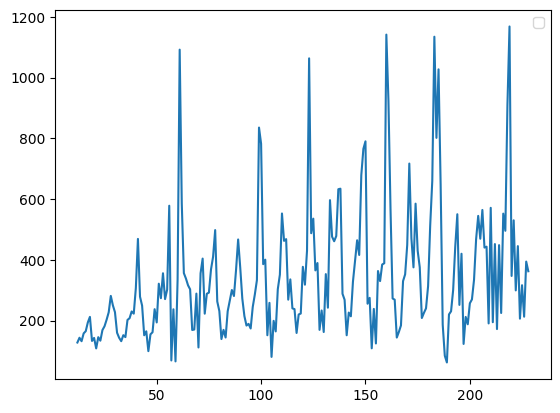

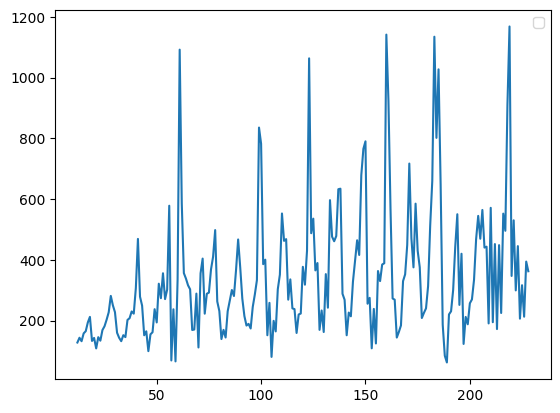

In [110]:
res.plot_predict()

In [122]:
dd.reset_index(inplace=True)

In [115]:
type(dd['date'])

pandas.core.series.Series

In [125]:
dd['date'] = pd.to_datetime(dd['date'])

In [128]:
mod = AutoReg(dd.set_index('date'), lags=3, old_names=False)
res = mod.fit( )
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:      Current Complaint   No. Observations:                  229
Model:                     AutoReg(3)   Log Likelihood               -1528.298
Method:               Conditional MLE   S.D. of innovations            209.232
Date:                Mon, 16 Oct 2023   AIC                           3066.596
Time:                        13:45:01   BIC                           3083.699
Sample:                             3   HQIC                          3073.498
                                  229                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  113.7865     23.242      4.896      0.000      68.233     159.340
Current Complaint.L1     0.7927      0.067     11.855      0.000       0.662       0.924
Current Comp

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [129]:
sel = ar_select_order(dd.set_index('date'), 3)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:      Current Complaint   No. Observations:                  229
Model:                     AutoReg(1)   Log Likelihood               -1543.650
Method:               Conditional MLE   S.D. of innovations            210.916
Date:                Mon, 16 Oct 2023   AIC                           3093.301
Time:                        13:46:39   BIC                           3103.589
Sample:                             1   HQIC                          3097.452
                                  229                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  100.9437     20.913      4.827      0.000      59.955     141.933
Current Complaint.L1     0.6894      0.048     14.382      0.000       0.595       0.783
            

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\ljens\scoop\apps\python\current\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [130]:
main_full_df = df.copy()
main_counts_df = syndromic_df.copy()
main_working_df = dd.copy()

In [131]:
dd.head()

,date,Current Complaint
0,2004-03-01,1
1,2004-06-01,1
2,2004-07-01,1
3,2004-08-01,1
4,2004-11-01,1


In [133]:
dd.set_index('date', inplace=True)

In [136]:
dd.index = pd.DatetimeIndex(dd.index).to_period('M')

In [137]:
dd.head()

,Current Complaint
date,
2004-03,1
2004-06,1
2004-07,1
2004-08,1
2004-11,1


In [139]:
sel = ar_select_order(dd, 3)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:      Current Complaint   No. Observations:                  229
Model:                     AutoReg(1)   Log Likelihood               -1543.650
Method:               Conditional MLE   S.D. of innovations            210.916
Date:                Mon, 16 Oct 2023   AIC                           3093.301
Time:                        14:05:29   BIC                           3103.589
Sample:                    06-30-2004   HQIC                          3097.452
                         - 10-31-2023                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  100.9437     20.913      4.827      0.000      59.955     141.933
Current Complaint.L1     0.6894      0.048     14.382      0.000       0.595       0.783
            

TypeError: float() argument must be a string or a real number, not 'Period'

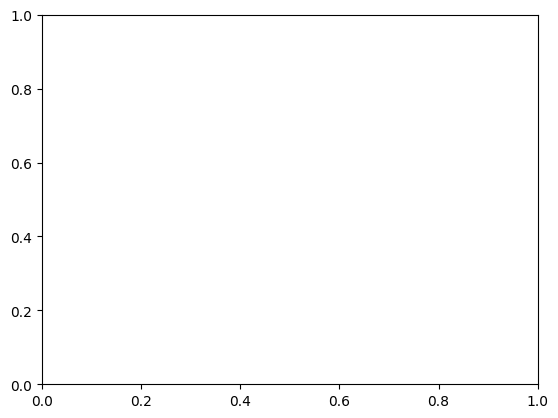

In [140]:
res.plot_predict()

In [142]:
dd['first_difference'] = dd['Current Complaint'] - dd['Current Complaint'].shift(12)

<AxesSubplot: xlabel='date'>

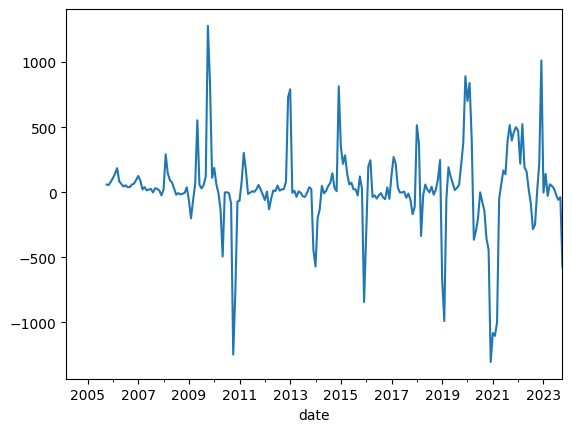

In [143]:
dd['first_difference'].plot()

In [149]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [145]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

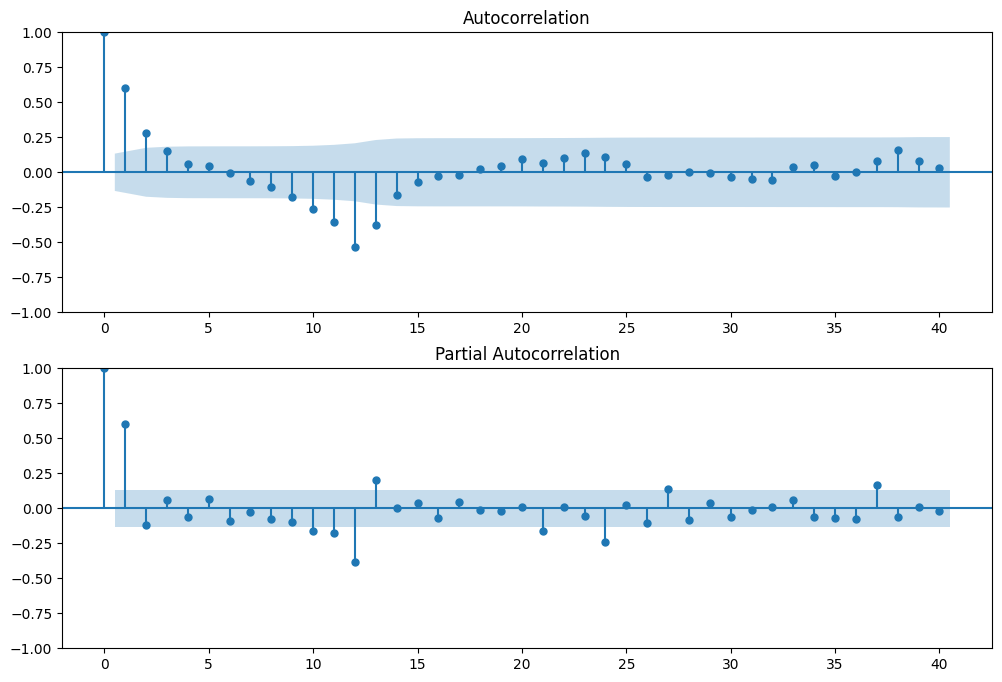

In [147]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dd['first_difference'].iloc[13:], lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dd['first_difference'].iloc[13:],lags=40, ax=ax2)

In [150]:
model = ARIMA(dd['Current Complaint'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Current Complaint   No. Observations:                  229
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1544.478
Date:                Mon, 16 Oct 2023   AIC                           3094.956
Time:                        14:26:05   BIC                           3105.244
Sample:                    03-31-2004   HQIC                          3099.107
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6492      0.060     10.821      0.000       0.532       0.767
ma.L1         -0.9758      0.026    -37.151      0.000      -1.027      -0.924
sigma2       4.45e+04   1875.858     23.724      0.000    4.08e+04    4.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.29   Jarque-Bera (JB):               931.20
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             1.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

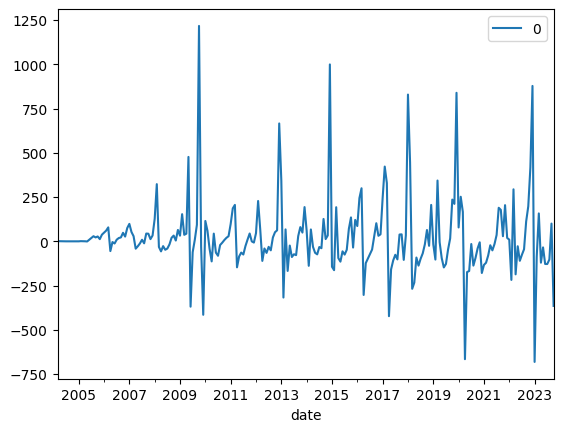

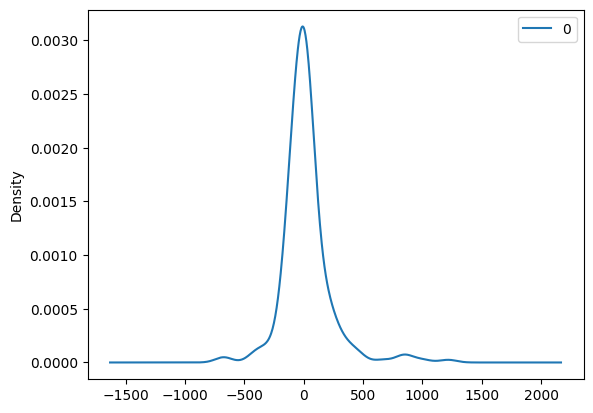

                 0
count   229.000000
mean     21.897425
std     209.884457
min    -681.352542
25%     -72.972078
50%       0.006140
75%      60.432380
max    1217.138752


In [152]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<AxesSubplot: xlabel='date'>

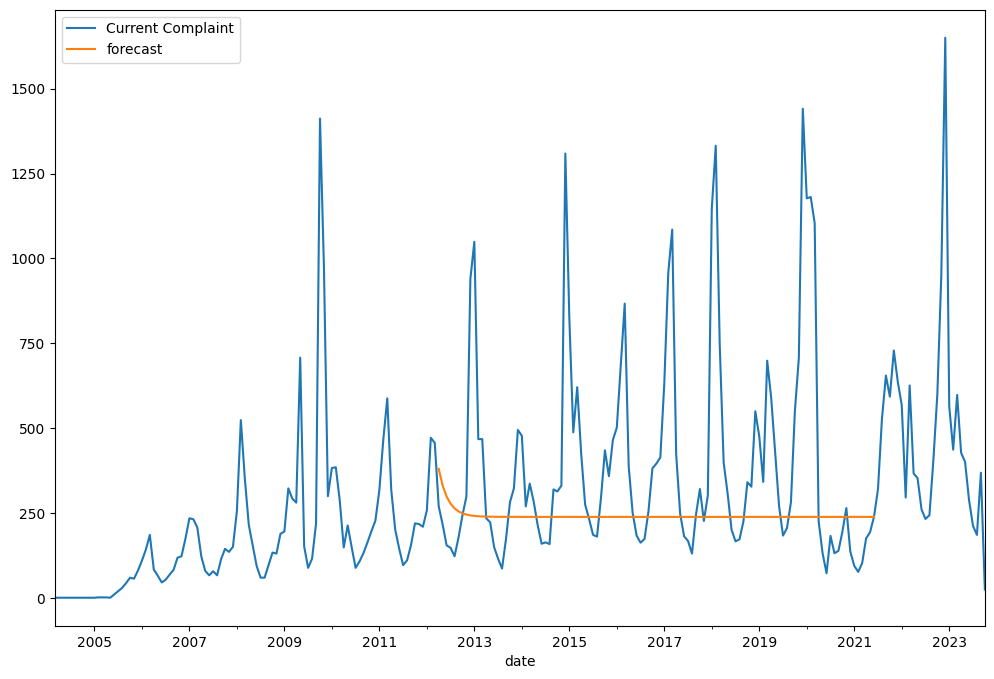

In [157]:
dd['forecast'] = model_fit.predict(start=90, end=200, dynamic=True)
dd[['Current Complaint','forecast']].plot(figsize=(12,8))

In [154]:
model = sm.tsa.statespace.SARIMAX(dd['Current Complaint'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Current Complaint   No. Observations:                  229
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1462.174
Date:                            Mon, 16 Oct 2023   AIC                           2934.347
Time:                                    14:43:20   BIC                           2951.224
Sample:                                03-31-2004   HQIC                          2941.165
                                     - 10-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5782      0.038     15.342      0.000       0.504       0.652
ma.L1         -1.0000     11.649     -0.086      0.932     -23.831      21.831
ar.S.L12       0.0084      0.078      0.108      0.914      -0.144       0.161
ma.S.L12      -0.8552      0.062    -13.800      0.000      -0.977      -0.734
sigma2      4.013e+04   4.67e+05      0.086      0.932   -8.76e+05    9.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):               668.39
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='date'>

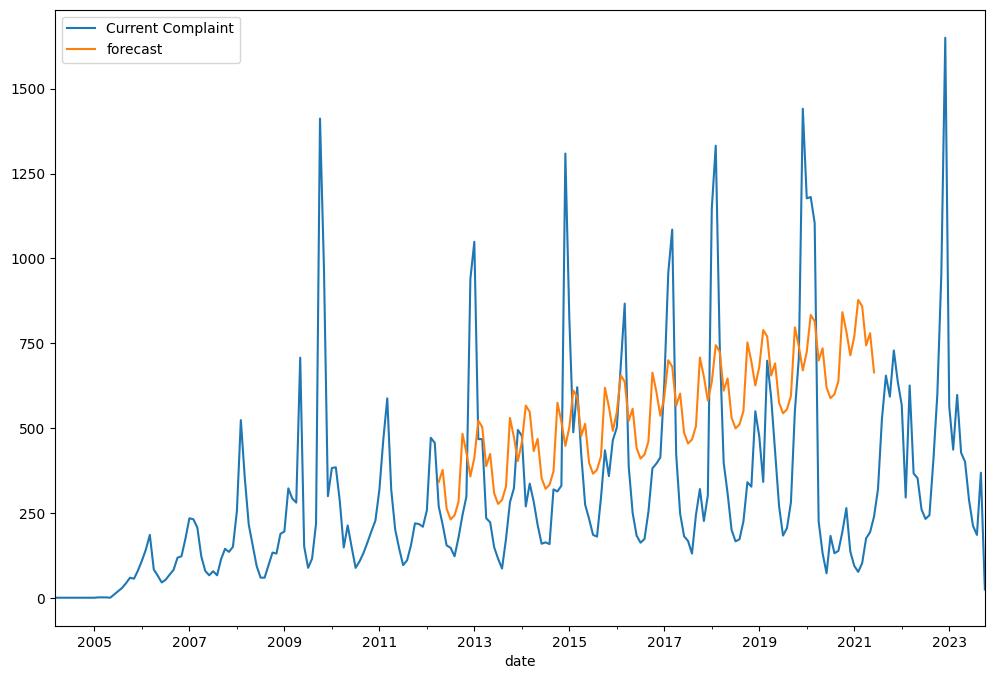

In [156]:
dd['forecast'] = results.predict(start=90, end=200, dynamic=True)
dd[['Current Complaint','forecast']].plot(figsize=(12,8))

In [158]:
main_full_df

,Admitted,Current Complaint,Initial Complaint,month,year
EpiWeek,,,,,
200413,2004-03-28 07:39:00,cough fever sore throat,cough fever sore throat,3,2004
200425,2004-06-25 20:30:00,sore throat fever aches,sore throat fever aches,6,2004
200427,2004-07-09 10:41:00,fever sore throat pulling at ears,fever sore throat pulling at ears,7,2004
200431,2004-08-01 22:46:00,pt sts sore throat fever,pt sts sore throat fever,8,2004
200445,2004-11-11 20:20:00,sick for 3 weeks diaphoretic fever cough,sick for 3 weeks diaphoretic fever cough,11,2004
...,...,...,...,...,...
202340,2023-10-03 10:46:00,severe headache high fever body aches cough fever,severe headache high fever body aches,10,2023
202340,2023-10-03 10:55:00,fever cough,fever cough,10,2023
202340,2023-10-03 12:11:00,abdominal pain sore throat fever,abdominal pain sore throat fever,10,2023


In [159]:
main_counts_df

,year,month,Current Complaint,date
0,2004,3,1,2004-03-01
1,2004,6,1,2004-06-01
2,2004,7,1,2004-07-01
3,2004,8,1,2004-08-01
4,2004,11,1,2004-11-01
...,...,...,...,...
224,2023,6,289,2023-06-01
225,2023,7,213,2023-07-01
226,2023,8,186,2023-08-01
227,2023,9,369,2023-09-01


In [160]:
data = pd.read_csv('dataset.csv')

In [161]:
data.head()

,Date,'Cough' Searches,Flu Cases,'Cold' Searches,AQI
0,2012-01-01,35,6609,39,40.580645
1,2012-02-01,35,7066,27,40.793103
2,2012-03-01,34,9728,29,42.580645
3,2012-04-01,34,4698,33,45.566667
4,2012-05-01,31,3449,17,59.774194


In [162]:
main_counts_df.head()

,year,month,Current Complaint,date
0,2004,3,1,2004-03-01
1,2004,6,1,2004-06-01
2,2004,7,1,2004-07-01
3,2004,8,1,2004-08-01
4,2004,11,1,2004-11-01


In [163]:
main_counts_df.rename(columns={'date':'Date'}, inplace=True)

In [164]:
data['Date'] = pd.to_datetime(data['Date'])

In [165]:
data.head()

,Date,'Cough' Searches,Flu Cases,'Cold' Searches,AQI
0,2012-01-01,35,6609,39,40.580645
1,2012-02-01,35,7066,27,40.793103
2,2012-03-01,34,9728,29,42.580645
3,2012-04-01,34,4698,33,45.566667
4,2012-05-01,31,3449,17,59.774194


In [166]:
main_counts_df.head()

,year,month,Current Complaint,Date
0,2004,3,1,2004-03-01
1,2004,6,1,2004-06-01
2,2004,7,1,2004-07-01
3,2004,8,1,2004-08-01
4,2004,11,1,2004-11-01


In [167]:
main_counts_df[['Current Complaint','Date']].join(data, on='Date')

ValueError: You are trying to merge on datetime64[ns] and int64 columns. If you wish to proceed you should use pd.concat

In [169]:
main_counts_df['Date'].describe()

C:\Users\ljens\AppData\Local\Temp\ipykernel_25028\50009253.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                     229
unique                    229
top       2004-03-01 00:00:00
freq                        1
first     2004-03-01 00:00:00
last      2023-10-01 00:00:00
Name: Date, dtype: object

In [170]:
data['Date'].describe()

C:\Users\ljens\AppData\Local\Temp\ipykernel_25028\3734259392.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                     140
unique                    140
top       2012-01-01 00:00:00
freq                        1
first     2012-01-01 00:00:00
last      2023-08-01 00:00:00
Name: Date, dtype: object

In [171]:
main_counts_df.head()

,year,month,Current Complaint,Date
0,2004,3,1,2004-03-01
1,2004,6,1,2004-06-01
2,2004,7,1,2004-07-01
3,2004,8,1,2004-08-01
4,2004,11,1,2004-11-01


In [176]:
merged_data = pd.DataFrame(main_counts_df.set_index('Date')['Current Complaint']).join(data.set_index('Date'), how='inner')

In [177]:
merged_data.head()

,Current Complaint,'Cough' Searches,Flu Cases,'Cold' Searches,AQI
Date,,,,,
2012-01-01,258,35,6609,39,40.580645
2012-02-01,472,35,7066,27,40.793103
2012-03-01,457,34,9728,29,42.580645
2012-04-01,270,34,4698,33,45.566667
2012-05-01,216,31,3449,17,59.774194


In [180]:
merged_data = merged_data.rename(columns={'Current Complaint':'ED_visits',"'Cough' Searches":'google_cough',"'Cold' Searches":'google_cold','Flu Cases':'reported_cases'})

In [181]:
merged_data.head()

,ED_visits,google_cough,reported_cases,google_cold,AQI
Date,,,,,
2012-01-01,258,35,6609,39,40.580645
2012-02-01,472,35,7066,27,40.793103
2012-03-01,457,34,9728,29,42.580645
2012-04-01,270,34,4698,33,45.566667
2012-05-01,216,31,3449,17,59.774194


In [182]:
merged_data.to_csv('dataset.csv')

In [183]:
main_counts_df.head()

,year,month,Current Complaint,Date
0,2004,3,1,2004-03-01
1,2004,6,1,2004-06-01
2,2004,7,1,2004-07-01
3,2004,8,1,2004-08-01
4,2004,11,1,2004-11-01


In [184]:
main_full_df.head()

,Admitted,Current Complaint,Initial Complaint,month,year
EpiWeek,,,,,
200413,2004-03-28 07:39:00,cough fever sore throat,cough fever sore throat,3,2004
200425,2004-06-25 20:30:00,sore throat fever aches,sore throat fever aches,6,2004
200427,2004-07-09 10:41:00,fever sore throat pulling at ears,fever sore throat pulling at ears,7,2004
200431,2004-08-01 22:46:00,pt sts sore throat fever,pt sts sore throat fever,8,2004
200445,2004-11-11 20:20:00,sick for 3 weeks diaphoretic fever cough,sick for 3 weeks diaphoretic fever cough,11,2004


In [186]:
main_working_df.to_csv('syndromic monthly counts .csv')